In [10]:
import math 
import queue
import networkx as nx
import matplotlib.pyplot as plt

graph = {
   'A': [('B', 8), ('D', 3), ('F', 6)],
   'B': [('A', 8), ('C', 3), ('D', 2)],
   'C': [('B', 3), ('E', 5)],
   'D': [('A', 3), ('B', 2), ('C', 1), ('E', 8), ('G', 7)],
   'E': [('C', 5), ('D', 8), ('I', 5), ('J', 3)],
   'F': [('A', 6), ('G', 1), ('H', 7)],
   'G': [('D', 7), ('F', 1), ('I', 1)],
   'H': [('F', 7), ('I', 2)],
   'I': [('E', 5), ('G', 1), ('H', 2), ('J', 3)],
   'J': [('E', 3), ('I', 3)]
}

coordinates = {
 'A': (0, 0), 'B': (2, 1), 'C': (4, 1), 'D': (1, -2), 'E': (6, 0),
 'F': (-1, -3), 'G': (2, -4), 'H': (0, -6), 'I': (4, -5), 'J': (7, -3)
}

In [11]:
def heuristic(n, goal):
    (x1, y1) = coordinates[n]
    (x2, y2) = coordinates[goal]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def get_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.append(current)
    return path[::-1]

In [12]:
def greedy_best_first(start, goal):
    q = queue.PriorityQueue()
    q.put((heuristic(start, goal), start))
    visited = set()
    came_from = {}

    while not q.empty():
        _, node = q.get()

        if node == goal:
            return get_path(came_from, node)

        visited.add(node)

        for neighbor, cost in graph[node]:
            if neighbor not in visited:
                came_from[neighbor] = node
                q.put((heuristic(neighbor, goal), neighbor))
    return None

In [13]:
def astar(start, goal):
    q = queue.PriorityQueue()
    q.put((heuristic(start, goal), 0, start))  
    came_from = {}
    g_cost = {start: 0}

    while not q.empty():
        f, g, node = q.get()

        if node == goal:
            return get_path(came_from, node), g_cost[goal]

        for neighbor, cost in graph[node]:
            temp_g = g + cost
            if temp_g < g_cost.get(neighbor, float('inf')):
                g_cost[neighbor] = temp_g
                came_from[neighbor] = node
                f_score = temp_g + heuristic(neighbor, goal)
                q.put((f_score, temp_g, neighbor))
    return None, None

In [20]:
greedy_path = greedy_best_first("A", "B")
astar_path, astar_cost = astar("A", "B")
print("Greedy Best First Path:", greedy_path)
print("A* Path:", astar_path)
print("A* Total Cost:", astar_cost)

Greedy Best First Path: ['A', 'B']
A* Path: ['A', 'D', 'B']
A* Total Cost: 5


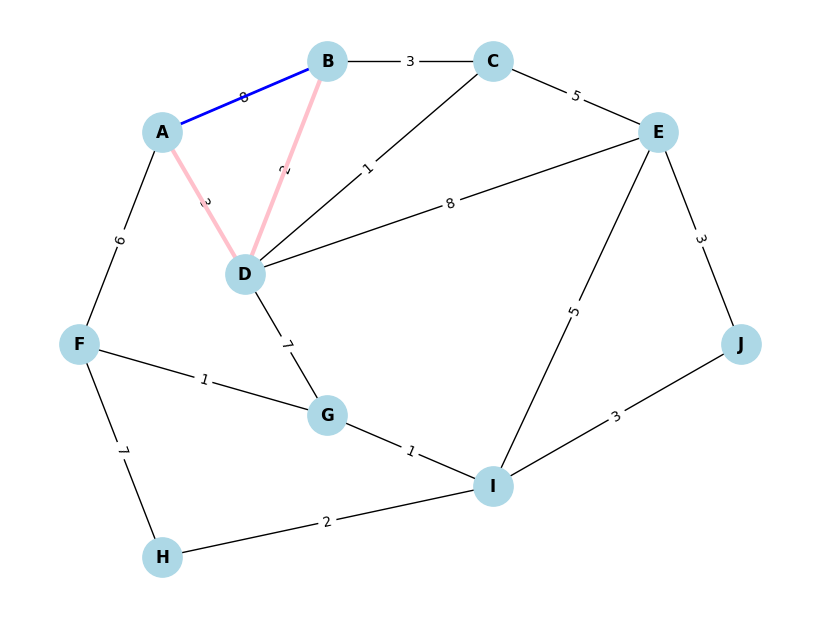

In [21]:
G = nx.Graph()
for node in graph:
    for neighbor, cost in graph[node]:
        G.add_edge(node, neighbor, weight=cost)

pos = coordinates
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

if astar_path:
    edges = [(astar_path[i], astar_path[i+1]) for i in range(len(astar_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=3, edge_color='pink')

if greedy_path:
    edges = [(greedy_path[i], greedy_path[i+1]) for i in range(len(greedy_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='blue')

plt.show()

In [16]:
import sys
print(sys.executable)

/Users/ryaan/Documents/AI-lab/.venv/bin/python
